In [1]:
import sys,os 
os.chdir('.\..\..')


In [2]:
import deep_nn.deep_nn_model as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
train = pd.read_csv("./data_analysis/projekt1/classification/data.simple.train.100.csv")
test = pd.read_csv("./data_analysis/projekt1/classification/data.simple.test.100.csv")


In [4]:
X = train[['x', 'y']].values.T
print(X.shape)
Y = train.cls.values.reshape(1, len(train))
print(Y.shape)

(2, 100)
(1, 100)


In [5]:
from IPython.display import HTML

In [6]:
nn_builder = nn.SequentialBuilder()
nn_builder.add_dense(2, 'relu')
nn_builder.add_dense(2, 'relu')
nn_builder.add_dense(1, 'sigmoid')
model = nn_builder.compile('binary_crossentropy', visualisation=True)

{'W1': array([[ 1.26475132,  0.30865908],
       [ 0.06823401, -1.31768833]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[-0.19614308, -0.25085248]]), 'b2': array([[0.]])}
Cost after epoch 0: 0.720830
Cost after epoch 1000: 0.131342
Cost after epoch 2000: 0.074574
Cost after epoch 3000: 0.101947
Cost after epoch 4000: 0.047399
Cost after epoch 5000: 0.086916
Cost after epoch 6000: 0.045844
Cost after epoch 7000: 0.048410
Cost after epoch 8000: 0.048821
Cost after epoch 9000: 0.044340
{'W1': array([[ 2.94201701,  2.35847029],
       [-2.45947368, -2.97839104]]), 'b1': array([[1.09238182],
       [1.1135303 ]]), 'W2': array([[ 3.71200743, -3.80557262]]), 'b2': array([[0.12149937]])}


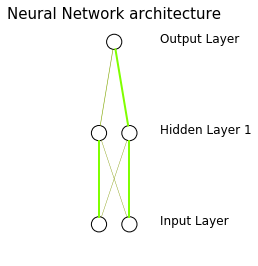

In [7]:
parameters, costs, animation = model.fit(X, Y == 1, num_epochs=10000)

In [8]:
plt.rcParams['animation.ffmpeg_path'] = 'c:/FFMPEG/bin/ffmpeg.exe'

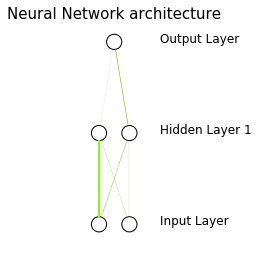

In [9]:
HTML(animation.to_html5_video())

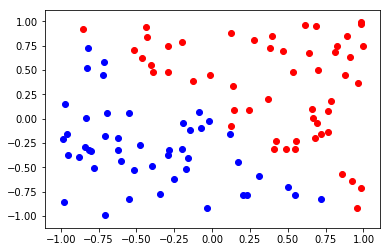

In [10]:
x0, y0 = X[:, (Y == 1)[0]]
plt.scatter(x0, y0, c='red')
x1, y1 = X[:, (Y == 2)[0]]
plt.scatter(x1, y1, c='blue')
plt.show()

In [11]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
    plt.show()
    

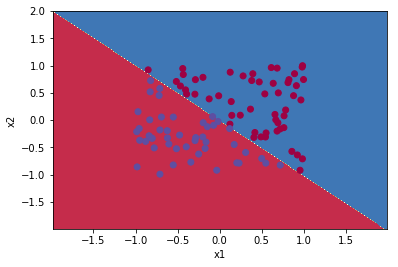

In [12]:
plot_decision_boundary(lambda x: model.predict_classes(x.T) , X, Y)

In [20]:
!python ./roundabout.py

In [13]:
p = model.predict_classes(X)

In [14]:
Y

array([[1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
        2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
        2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
        2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1]], dtype=int64)

In [15]:
p = (p[0] == False) +1
p

array([1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1])

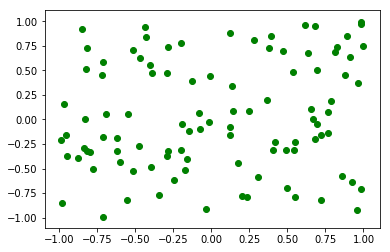

In [16]:
x2, y2 = X[:, (p == Y)[0]]
x3, y3 = X[:, (p != Y)[0]]
#plt.scatter(x0, y0, c='red')
#plt.scatter(x1, y1, c='blue')
plt.scatter(x2, y2, c='green')
plt.scatter(x3, y3, c='red')

plt.show()

In [17]:
train1000 = pd.read_csv("./data_analysis/projekt1/classification/data.three_gauss.train.100.csv")
test1000 = pd.read_csv("./data_analysis/projekt1/classification/data.three_gauss.test.100.csv")
n = len(train1000)
X = train1000[['x', 'y']].values.T
Y = train1000.cls.values.reshape(1,-1) == 1
Xt = test1000[['x', 'y']].values.T
Yt = test1000.cls.values.reshape(1,-1) == 1

model2 = nn_builder.compile('binary_crossentropy')

x0, y0 = X[:, (Y == 0)[0]]
x1, y1 = X[:, (Y == 1)[0]]

x2, y2 = Xt[:, (Yt == 0)[0]]
x3, y3 = Xt[:, (Yt == 1)[0]]


model2.fit(X, (Y == 1), num_epochs=2000)

Cost after epoch 0: 0.692540
Cost after epoch 1000: 0.162744


AttributeError: 'NoneType' object has no attribute 'draw'

In [ ]:
plot_decision_boundary(lambda x: model2.predict_classes(x.T) , X, Y)